# Análise de Carteira de Investimentos: Risco x Retorno (2020–2025)

In [11]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# lista de 5 ativos brasileiros que serão analisados
ativos = ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'BOVA11.SA', 'ABEV3.SA']

# baixa dados históricos de 2020 a 2025
dados = yf.download(ativos, start="2020-01-01", end="2025-01-01", group_by='ticker')

# adj Close = preço de fechamento ajustado para dividendos e splits
adj_close = pd.DataFrame()
for ativo in ativos:
    adj_close[ativo] = dados[ativo]['Close']

# breve resultado
print("Preços Ajustados:")
print(adj_close.head())


C:\Users\dfado\AppData\Local\Temp\ipykernel_3584\2670045934.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dados = yf.download(ativos, start="2020-01-01", end="2025-01-01", group_by='ticker')
[*********************100%***********************]  5 of 5 completed

Preços Ajustados:
            PETR4.SA   VALE3.SA   ITUB4.SA   BOVA11.SA   ABEV3.SA
Date                                                             
2020-01-02  9.094494  31.718029  25.926254  114.239998  14.897884
2020-01-03  9.020434  31.484512  25.653559  113.800003  14.688381
2020-01-06  9.127080  31.297691  25.271799  112.589996  14.758213
2020-01-07  9.091531  31.525379  24.685499  112.239998  14.789249
2020-01-08  9.035246  31.531212  24.283283  111.949997  14.719418


### Cálculo dos retornos diários e anuais

In [12]:
# Calcula a variação percentual diária de cada ativo
retornos_diarios = adj_close.pct_change().dropna()
print("\nRetornos Diários: ")
print(retornos_diarios.head())

# Retornos Anuais Médios
# Considerando ~252 dias úteis por ano
retornos_anuais = (1 + retornos_diarios.mean())**252 - 1
print("\nRetornos Anuais Médios:")
print(retornos_anuais)

# Retornos Anuais por Ano
adj_close['Ano'] = adj_close.index.year

# Calcula o retorno de cada ativo em cada ano
retornos_anuais_por_ano = adj_close.groupby('Ano').apply(
    lambda x: x.drop(columns='Ano').iloc[-1] / x.drop(columns='Ano').iloc[0] - 1
)

# Mostrar retornos anuais de cada ativo por ano
print("\nRetornos Anuais por Ano:")
print(retornos_anuais_por_ano)

# Garantir que só fiquem os ativos (sem a coluna "Ano")
if "Ano" in adj_close.columns:
    adj_close = adj_close.drop(columns=["Ano"])


C:\Users\dfado\AppData\Local\Temp\ipykernel_3584\200030756.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  retornos_anuais_por_ano = adj_close.groupby('Ano').apply(



Retornos Diários: 
            PETR4.SA  VALE3.SA  ITUB4.SA  BOVA11.SA  ABEV3.SA
Date                                                         
2020-01-03 -0.008143 -0.007362 -0.010518  -0.003851 -0.014063
2020-01-06  0.011823 -0.005934 -0.014881  -0.010633  0.004754
2020-01-07 -0.003895  0.007275 -0.023200  -0.003109  0.002103
2020-01-08 -0.006191  0.000185 -0.016294  -0.002584 -0.004722
2020-01-09 -0.003279 -0.013146 -0.019933  -0.002590 -0.007907

Retornos Anuais Médios:
PETR4.SA     0.443364
VALE3.SA     0.179252
ITUB4.SA     0.054046
BOVA11.SA    0.040394
ABEV3.SA    -0.008996
dtype: float64

Retornos Anuais por Ano:
      PETR4.SA  VALE3.SA  ITUB4.SA  BOVA11.SA  ABEV3.SA
Ano                                                    
2020 -0.076854  0.676894 -0.146174   0.011467 -0.163344
2021  0.210751  0.002747 -0.298177  -0.116487  0.039932
2022  0.349021  0.248862  0.208454   0.060242 -0.002932
2023  1.103788 -0.062826  0.451683   0.270486  0.018158
2024  0.173838 -0.226486 -0.016828

### Visualização

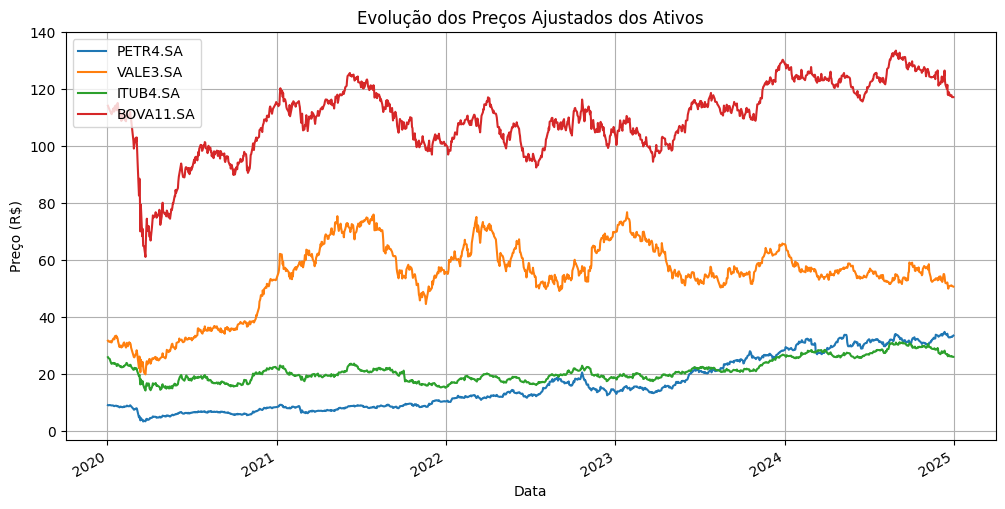

In [13]:
adj_close.iloc[:, :-1].plot(figsize=(12,6), title="Evolução dos Preços Ajustados dos Ativos")
plt.xlabel("Data")
plt.ylabel("Preço (R$)")
plt.grid(True)
plt.show()

# A seguir é possível visualizar a evoluação histórica dos ativos ao longo dos 5 anos
# Pode-se observar que os ativos da BOVA11 e da VALE3 foram os que sofreram maior variação em relação aos outros


### Retornos Anuais por Ano

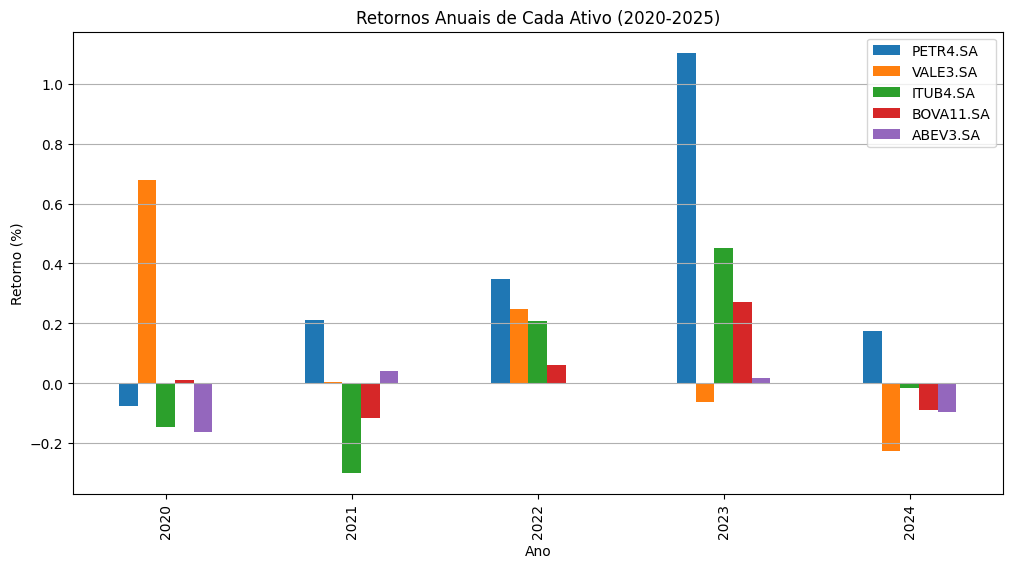

In [14]:
retornos_anuais_por_ano.plot(kind='bar', figsize=(12,6))
plt.title("Retornos Anuais de Cada Ativo (2020-2025)")
plt.ylabel("Retorno (%)")
plt.xlabel("Ano")
plt.grid(axis='y')
plt.show()

# A seguir, visualizamos os retornos anuais de cada ativo de 2020 a 2024.
# Cada barra representa o retorno total do ano para o ativo correspondente.
# Permite identificar anos de alta ou baixa performance, por exemplo, uma maior variação entre ativos em 2023.

### Volatilidade e Risco da Carteira

In [15]:
# Qual é a volatilidade (risco) de cada ativo individualmente?
    # Permite medir quanto os preços variam em torno da média, ou seja, o risco de cada ativo.

# Como os ativos se relacionam entre si?
    # A correlação mostra se os ativos tendem a subir e cair juntos, ajudando a montar uma carteira diversificada.

# Qual seria o risco de uma carteira formada por esses ativos?
    #Considera volatilidade individual e correlação para calcular risco combinado.

#### Volatilidade Diária e Anualizada

In [16]:
vol_diaria = retornos_diarios.std()
print("Volatilidade Diária (%):")
print(vol_diaria * 100)

# Volatilidade anualizada (~252 dias úteis por ano)
vol_anual = vol_diaria * (252 ** 0.5)
print("\nVolatilidade Anualizada (%):")
print(vol_anual * 100)

Volatilidade Diária (%):
PETR4.SA     2.809021
VALE3.SA     2.366006
ITUB4.SA     2.019198
BOVA11.SA    1.639646
ABEV3.SA     1.886853
dtype: float64

Volatilidade Anualizada (%):
PETR4.SA     44.591823
VALE3.SA     37.559189
ITUB4.SA     32.053779
BOVA11.SA    26.028575
ABEV3.SA     29.952869
dtype: float64


#### Correlação entre ativos

In [17]:
# Valores próximos de 1 → ativos se movem juntos.
# Valores próximos de 0 → movimentos independentes.
# Valores negativos → movimentos opostos.

# Matriz de correlação diária
correlacao = retornos_diarios.corr()
print("\nCorrelação entre Ativos:")
print(correlacao)


Correlação entre Ativos:
           PETR4.SA  VALE3.SA  ITUB4.SA  BOVA11.SA  ABEV3.SA
PETR4.SA   1.000000  0.470765  0.506039   0.728505  0.378691
VALE3.SA   0.470765  1.000000  0.366429   0.631489  0.232674
ITUB4.SA   0.506039  0.366429  1.000000   0.749367  0.510325
BOVA11.SA  0.728505  0.631489  0.749367   1.000000  0.593847
ABEV3.SA   0.378691  0.232674  0.510325   0.593847  1.000000


### Risco e Retorno (Volatilidade e Sharpe Ratio)

In [18]:
# Perguntas a serem respondidas
# Qual ativo teve maior risco (volatilidade)?
# Qual ativo entregou melhor relação risco-retorno (Índice de Sharpe)?

In [19]:
import numpy as np

# Retornos diários (já temos do passo anterior, mas recalculamos para clareza)
retornos = adj_close.pct_change().dropna()

# Volatilidade (risco) anualizada
volatilidade_anual = retornos.std() * np.sqrt(252)

# Retorno médio anualizado
retorno_medio_anual = retornos.mean() * 252

# Sharpe Ratio (assumindo taxa livre de risco = 0)
sharpe_ratio = retorno_medio_anual / volatilidade_anual

# Mostrar resultados
print("📊 Risco e Retorno dos Ativos (2020-2025):")
print(pd.DataFrame({
    "Retorno Médio Anual (%)": retorno_medio_anual * 100,
    "Volatilidade Anual (%)": volatilidade_anual * 100,
    "Sharpe Ratio": sharpe_ratio
}).round(2))


📊 Risco e Retorno dos Ativos (2020-2025):
           Retorno Médio Anual (%)  Volatilidade Anual (%)  Sharpe Ratio
PETR4.SA                     36.72                   44.59          0.82
VALE3.SA                     16.49                   37.56          0.44
ITUB4.SA                      5.26                   32.05          0.16
BOVA11.SA                     3.96                   26.03          0.15
ABEV3.SA                     -0.90                   29.95         -0.03


#### Interpretação dos resultados (2020–2025):

**PETR4.SA (Petrobras) →**
Maior retorno médio (36,7% ao ano), mas também com a maior volatilidade (44,6%). Sharpe Ratio de 0,82, mostrando um risco elevado, mas ainda com boa compensação.

**VALE3.SA (Vale) →**
Retorno médio de 16,5% e volatilidade de 37,6%. Sharpe Ratio 0,44, ou seja, retorno razoável, mas ainda arriscado.

**ITUB4.SA (Itaú) →**
Mais conservadora: retorno médio baixo (5,2%), risco moderado (32%), Sharpe bem baixo (0,16).

**BOVA11.SA (ETF que replica o Ibovespa) →**
Quase neutro: retorno médio de 3,9%, risco mais baixo (26%), mas Sharpe Ratio também pequeno (0,15). Representa bem o mercado.

**ABEV3.SA (Ambev) →**
Única com retorno médio negativo (-0,9%), Sharpe -0,03, ou seja, não compensou o risco.

### Simulação de Portfólios

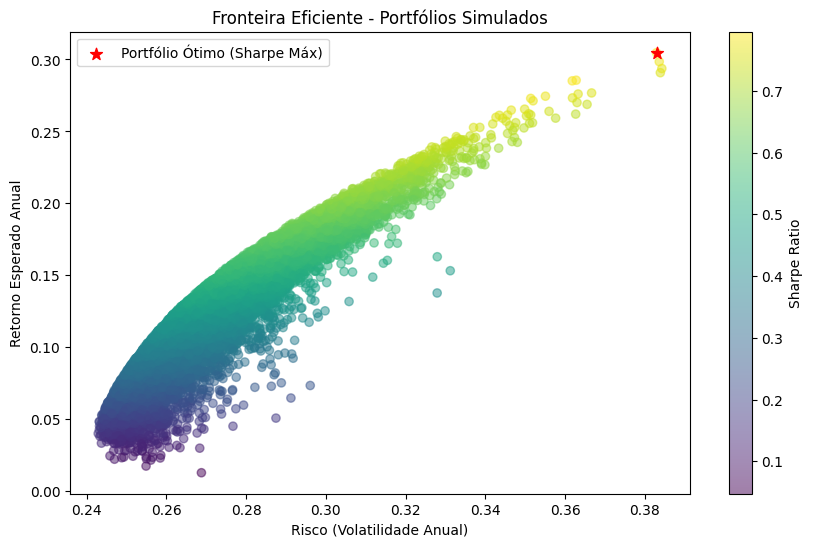

Portfólio Ótimo (Sharpe Máx):
PETR4.SA: 76.78%
VALE3.SA: 13.04%
ITUB4.SA: 1.92%
BOVA11.SA: 1.96%
ABEV3.SA: 6.31%

Retorno esperado: 30.47%
Risco esperado: 38.29%
Sharpe Ratio: 0.80


In [20]:
# Calcular retornos diários
retornos_diarios = adj_close.pct_change().dropna()

# Retorno médio anual de cada ativo
retorno_medio = retornos_diarios.mean() * 252

# Matriz de covariância anualizada
cov_matriz = retornos_diarios.cov() * 252

# Simulação de 20.000 portfólios aleatórios
n_portfolios = 20000
np.random.seed(42)

resultados = np.zeros((3, n_portfolios))
pesos_lista = []

for i in range(n_portfolios):
    pesos = np.random.random(len(ativos))
    pesos /= np.sum(pesos)  # garantir que somem 100%
    pesos_lista.append(pesos)

    retorno = np.dot(pesos, retorno_medio)
    risco = np.sqrt(np.dot(pesos.T, np.dot(cov_matriz, pesos)))
    sharpe = retorno / risco

    resultados[0, i] = retorno
    resultados[1, i] = risco
    resultados[2, i] = sharpe

# Identificar portfólio com maior Sharpe
max_sharpe_idx = np.argmax(resultados[2])
retorno_max_sharpe = resultados[0, max_sharpe_idx]
risco_max_sharpe = resultados[1, max_sharpe_idx]
pesos_max_sharpe = pesos_lista[max_sharpe_idx]

# Plotar Fronteira Eficiente
plt.figure(figsize=(10, 6))
plt.scatter(resultados[1, :], resultados[0, :], c=resultados[2, :], cmap='viridis', alpha=0.5)
plt.colorbar(label="Sharpe Ratio")
plt.scatter(risco_max_sharpe, retorno_max_sharpe, c='red', s=80, marker='*', label="Portfólio Ótimo (Sharpe Máx)")
plt.xlabel("Risco (Volatilidade Anual)")
plt.ylabel("Retorno Esperado Anual")
plt.title("Fronteira Eficiente - Portfólios Simulados")
plt.legend()
plt.show()

# Exibir composição do portfólio ótimo
print("Portfólio Ótimo (Sharpe Máx):")
for ativo, peso in zip(ativos, pesos_max_sharpe):
    print(f"{ativo}: {peso:.2%}")

print(f"\nRetorno esperado: {retorno_max_sharpe:.2%}")
print(f"Risco esperado: {risco_max_sharpe:.2%}")
print(f"Sharpe Ratio: {resultados[2, max_sharpe_idx]:.2f}")


### Interpretação dos Resultados – Portfólio Ótimo

**Métricas do Portfólio Ótimo**

- **Retorno esperado:** `30.47%`
- **Risco (volatilidade):** `38.29%`
- **Índice de Sharpe:** `0.80`

1. **Predominância da PETR4.SA:**  
   O ativo PETR4.SA (Petrobras) aparece como o mais relevante no portfólio, com mais de **75% da alocação**, indicando que suas características históricas de risco e retorno contribuíram significativamente para o resultado.

2. **Diversificação moderada:**  
   Embora haja diversificação com outros ativos (VALE3, ITUB4, BOVA11 e ABEV3), a concentração ainda é elevada em um único ativo, o que pode aumentar a exposição a riscos específicos do setor de energia/petróleo.

3. **Sharpe Ratio de 0.80:**  
   Um índice de Sharpe próximo de **1.0** é considerado razoável, mostrando que o portfólio oferece uma relação relativamente boa entre risco e retorno.  
   Porém, não está em níveis excelentes (>1.5), o que sugere que ainda há espaço para melhorias.

4. **Risco elevado:**  
   A volatilidade do portfólio é de **38.29%**, um valor bastante alto, o que indica fortes oscilações nos retornos esperados. Investidores mais conservadores poderiam considerar ajustes para reduzir esse risco.


**Conclusão:**  
O portfólio ótimo obtido privilegia ativos de maior retorno esperado, ainda que concentre bastante risco em **PETR4.SA**. A interpretação dos resultados reforça a importância da diversificação e do alinhamento do portfólio ao perfil de risco do investidor.
